# Cryptocompare API Exercise

Going through the API notebook using the [Cryptocompare.com](https://www.cryptocompare.com/) API as it is relevant to the question I want to answer in my EDA project.

In [1]:
import requests

In [2]:
# Make a request to get historical Bitcoin data
response = requests.get('https://min-api.cryptocompare.com/data/histoday')

print(response.status_code)

200


In [3]:
params = {'fsym': 'BTC', 'tsym': 'USD', 'limit': 100}

response = requests.get('https://min-api.cryptocompare.com/data/histoday', params=params)

print(response.content)

b'{"Response":"Success","Type":100,"Aggregated":false,"Data":[{"time":1512518400,"close":13749.57,"high":13843.2,"low":11661.76,"open":11667.13,"volumefrom":191576.66,"volumeto":2437037791.81},{"time":1512604800,"close":16850.31,"high":16879.26,"low":13401.61,"open":13750.09,"volumefrom":297108.66,"volumeto":4510225316.19},{"time":1512691200,"close":16047.61,"high":17294.85,"low":13906.1,"open":16867.98,"volumefrom":286762.02,"volumeto":4546014731.58},{"time":1512777600,"close":14843.42,"high":16313.18,"low":13151.47,"open":16048.18,"volumefrom":181979.81,"volumeto":2699876215.33},{"time":1512864000,"close":15059.6,"high":15783.2,"low":13031,"open":14839.98,"volumefrom":201620.09,"volumeto":2904037859.64},{"time":1512950400,"close":16732.47,"high":17399.18,"low":15024.56,"open":15060.45,"volumefrom":159724.56,"volumeto":2634267594.52},{"time":1513036800,"close":17083.9,"high":17560.65,"low":16254.53,"open":16733.29,"volumefrom":132846.57,"volumeto":2246138895.89},{"time":1513123200,"cl

In [4]:
import json

In [5]:
data = response.json()['Data']
print(data[0])

{'time': 1512518400, 'close': 13749.57, 'high': 13843.2, 'low': 11661.76, 'open': 11667.13, 'volumefrom': 191576.66, 'volumeto': 2437037791.81}


In [6]:
import pandas as pd
import datetime

In [9]:
df = pd.DataFrame(data)
df['date'] = [datetime.date.fromtimestamp(d) for d in df.time]

In [10]:
df.head()

,close,high,low,open,time,volumefrom,volumeto,date
0,13749.57,13843.20,11661.76,11667.13,1512518400,191576.66,2.437038e+09,2017-12-05
1,16850.31,16879.26,13401.61,13750.09,1512604800,297108.66,4.510225e+09,2017-12-06
2,16047.61,17294.85,13906.10,16867.98,1512691200,286762.02,4.546015e+09,2017-12-07
3,14843.42,16313.18,13151.47,16048.18,1512777600,181979.81,2.699876e+09,2017-12-08
4,15059.60,15783.20,13031.00,14839.98,1512864000,201620.09,2.904038e+09,2017-12-09


In [11]:
df = df[['open', 'high', 'low', 'close', 'volumeto', 'date']]
df.head()

,open,high,low,close,volumeto,date
0,11667.13,13843.20,11661.76,13749.57,2.437038e+09,2017-12-05
1,13750.09,16879.26,13401.61,16850.31,4.510225e+09,2017-12-06
2,16867.98,17294.85,13906.10,16047.61,4.546015e+09,2017-12-07
3,16048.18,16313.18,13151.47,14843.42,2.699876e+09,2017-12-08
4,14839.98,15783.20,13031.00,15059.60,2.904038e+09,2017-12-09


In [27]:
# Create list of coins that we want databases for
coin_list = ['BTC', 'ETH', 'XRP', 'BCH', 'LTC', 'ADA', 'NEO', 'XLM', 'EOS', 'XMR']

# Create a function to generate desired dataframe for given coin name
def generate_historical_dataframe(sym, curr='USD', limit=100):
    url = 'https://min-api.cryptocompare.com/data/histoday'
    params = {'fsym': sym, 'tsym': curr, 'limit': limit}
    
    response = requests.get(url, params=params)
    data = response.json()['Data']
    df = pd.DataFrame(data)
    df['date'] = [datetime.date.fromtimestamp(d) for d in df.time]
    df = df[['open', 'high', 'low', 'close', 'volumeto', 'date']]
    
    return df

In [28]:
import sqlite3

# Write function to create a database for all coins in coinlist
def create_database(df, table_name, sqlite_file):
    conn = sqlite3.connect(sqlite_file)
    c = conn.cursor()

    df.to_sql(table_name, conn, if_exists='replace')
    
    conn.commit()
    conn.close()

In [31]:
create_database(df, "TEST1", 'test_db.sqlite')

In [32]:
# Name of the database file
sqlite_file = 'cryptocompare_db.sqlite'

# Loop through coin list, get historical data, create new database
for coin in coin_list:
    coin_df = generate_historical_dataframe(coin)
    create_database(coin_df, coin, sqlite_file)

# Create a Securities Master Database 

## Schema 

### 1. Data - id | name | url 

### 2. Symbol - data_id | symbol | name | sector | exchange

### 3. Daily_Price - data_id | symbol | date | open | high | low | close | volume

In [16]:
import sqlite3

# Initialize variables for file name, table, columns, data types 
sqlite_file = 'securities_master_db.sqlite'
table_name = 'Data'
id_col = 'id'
name_col = 'name'
url_col = 'url'
dtype_int = 'INTEGER'
dtype_text = 'TEXT'

# Connect to the database file
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

# Create a new table with 3 columns
c.execute('CREATE TABLE {tn} ({ic} {dti} PRIMARY KEY, {nc} {dtt}, {uc} {dtt})'\
         .format(tn=table_name, ic=id_col, dti=dtype_int, nc=name_col, dtt=dtype_text, uc=url_col))

# Commit changes and close
conn.commit()
conn.close()

In [1]:
import sqlite3
sqlite_file = 'securities_master_db.sqlite'

# Drop table script to test
table_name = 'Symbol'
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

c.execute('DROP TABLE {tn}'.format(tn=table_name))

conn.commit()
conn.close()

In [9]:
# Drop table script to test
table_name = 'Symbol'
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

c.execute('DROP TABLE {tn}'.format(tn=table_name))

conn.commit()
conn.close()

In [4]:
# Define connect and close functions so you dont have to keep repeating them
def connect(sqlite_file):
    conn = sqlite3.connect(sqlite_file)
    c = conn.cursor()
    return conn, c

def close(conn):
    conn.commit()
    conn.close()

In [18]:
# Add value for Cryptocompare to Data table
conn, c = connect(sqlite_file)

c.execute("INSERT INTO {tn} ({ic}, {nc}, {uc}) VALUES (1, 'Cryptocompare', 'https://min-api.cryptocompare.com')"\
          .format(tn=table_name, ic=id_col, nc=name_col, uc=url_col))

close(conn)

In [19]:
# Add value for Quandl to Data table
conn, c = connect(sqlite_file)

c.execute("INSERT INTO {tn} ({ic}, {nc}, {uc}) VALUES (2, 'Quandl', 'https://docs.quandl.com')"\
          .format(tn=table_name, ic=id_col, nc=name_col, uc=url_col))

close(conn)

In [24]:
sqlite_file = 'securities_master_db.sqlite'
table_name = 'Data'
id_col = 'id'
name_col = 'name'
url_col = 'url'
dtype_int = 'INTEGER'
dtype_text = 'TEXT'
# Add value for Quantopian to Data table
conn, c = connect(sqlite_file)

c.execute("INSERT INTO {tn} ({ic}, {nc}, {uc}) VALUES (3, 'Quantopian', 'https://www.quantopian.com/data')"\
          .format(tn=table_name, ic=id_col, nc=name_col, uc=url_col))

close(conn)

In [5]:
table_name = 'Data'
id_col = 'id'
name_col = 'name'
url_col = 'url'
dtype_int = 'INTEGER'
dtype_text = 'TEXT'

# Add value for Test to Data table
conn, c = connect(sqlite_file)

c.execute("INSERT INTO {tn} ({nc}, {uc}) VALUES ('Test', 'https://www.test.com/')"\
          .format(tn=table_name, nc=name_col, uc=url_col))

close(conn)

In [7]:
conn, c = connect(sqlite_file)

c.execute("DELETE FROM Data WHERE id = 4")

close(conn)

In [10]:
# Create table for symbol
# Initialize variables for file name, table, columns, data types 
sqlite_file = 'securities_master_db.sqlite'

table_name = 'Symbols'

data_table = 'Data'
data_id = 'id'

id_col = 'id'
data_id_col = 'data_id'
symbol_col = 'symbol'
name_col = 'name'
sector_col = 'sector'
exchange_col = 'exchange'
dtype_int = 'INTEGER'
dtype_text = 'TEXT'

# Connect to the database file
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

# Create a new table with 3 columns
c.execute('CREATE TABLE {tn} ({ic} {dti} PRIMARY KEY,\
                              {dc} {dti},\
                              {sc} {dtt},\
                              {nc} {dtt},\
                              {sec} {dtt},\
                              {ec} {dtt},\
                              FOREIGN KEY ({dc}) REFERENCES {dt} ({dic}))'\
         .format(tn=table_name, ic=id_col, dti=dtype_int, dc=data_id_col, sc=symbol_col,\
                 dtt=dtype_text, nc=name_col, sec=sector_col, ec=exchange_col,\
                 dt=data_table, dic=data_id))

# Commit changes and close
conn.commit()
conn.close()

In [12]:
# Create table for daily_price
# Initialize variables for file name, table, columns, data types 
sqlite_file = 'securities_master_db.sqlite'

table_name = 'Daily_Prices'
symbols_table = 'Symbols'

id_col = 'id'
data_id_col = 'data_id'
symbol_col = 'symbol'
date_col = 'date'
open_col = 'open'
high_col = 'high'
low_col = 'low'
close_col = 'close'
volume_col = 'volume'

dtype_int = 'INTEGER'
dtype_text = 'TEXT'
dtype_real = 'REAL'

# Connect to the database file
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

# Create a new table with 3 columns
c.execute('CREATE TABLE {tn} ({ic} {dti} PRIMARY KEY,\
                              {dc} {dti},\
                              {sc} {dtt},\
                              {dtc} {dtt},\
                              {oc} {dtr},\
                              {hc} {dtr},\
                              {lc} {dtr},\
                              {cc} {dtr},\
                              {vc} {dti},\
                              FOREIGN KEY ({sc}) REFERENCES {st} ({sc}))'\
         .format(tn=table_name, ic=id_col, dti=dtype_int, dc=data_id_col, sc=symbol_col,\
                 dtt=dtype_text, dtc=date_col, oc=open_col, dtr=dtype_real, hc=high_col,\
                 lc=low_col, cc=close_col, vc=volume_col, st=symbols_table))

# Commit changes and close
conn.commit()
conn.close()

In [30]:
import pandas as pd

In [35]:
import quandl

data = quandl.get("SCF/CME_CL1_FW", authtoken="Hv95pPh1xQWzt5DFhxS7")

data.tail()

,Open,High,Low,Settle,Volume,Prev. Day Open Interest
Date,,,,,,
2014-12-24,56.80,57.15,55.07,55.84,174969.0,305486.0
2014-12-26,55.86,56.59,54.51,54.73,138280.0,304247.0
2014-12-29,55.05,55.74,52.90,53.61,253089.0,305205.0
2014-12-30,53.72,54.32,52.70,54.12,230228.0,310358.0
2014-12-31,53.87,54.02,52.44,53.27,247510.0,309473.0


In [36]:
data.describe()

,Open,High,Low,Settle,Volume,Prev. Day Open Interest
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,81.796207,82.893532,80.582003,81.779758,241235.096146,244649.405244
std,19.832869,19.961713,19.695067,19.855341,96750.320207,77818.320072
min,34.360000,36.250000,33.550000,33.980000,50.000000,69653.000000
25%,65.680000,66.560000,64.650000,65.820000,175510.600000,181349.400000
50%,82.550000,83.720000,81.250000,82.550000,242868.000000,250120.000000
75%,96.900000,97.820000,95.560000,96.920000,301777.000000,305205.000000
max,145.190000,147.270000,143.220000,145.290000,670082.000000,441512.000000


In [38]:
data.index

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14',
               ...
               '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-22',
               '2014-12-23', '2014-12-24', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

In [39]:
import matplotlib.pyplot as plt

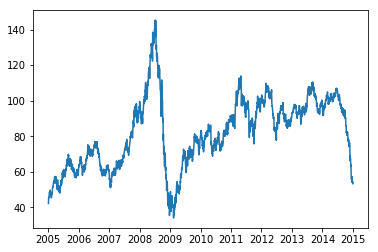

In [40]:
plt.plot(data.index, data.Settle)

plt.show()

In [15]:
general_code = 'SCF/CME_{}1_FW'.format('Insert ticker here')

sectors = {'grains': ['C', 'W', 'S'],
           'energies': ['CL', 'NG', 'HO'],
           'treasuries': ['US'],
           'forex': ['AD', 'CD', 'EC', 'BP', 'JY'],
           'indexes': ['ES'],
           'metals': ['GC', 'SI']}

all_futures = sectors.values()


tickers_names = {'CL': 'Crude', 'GC': 'Gold', 'AD': 'Aussie', 'CD': 'Canadien',
                 'EC': 'Euro', 'BP': 'Pound', 'JY': 'Yen', 'US': '30-yr', 'C': 'Corn',
                 'W': 'Wheat', 'S': 'Soybeans', 'ES': 'E-mini', 'NG': 'NatGas',
                 'HO': 'HeatOil', 'SI': 'Silver'}

In [16]:
import pandas as pd
import numpy as np
import quandl

# Get Quandl info into dict of dataframes
def generate_df_dict(futures, api_key):
    ''' This function takes in a list of futures symbols and returns a dict object
        with the symbols as keys and a dataframe of price info as values
        
        Args: futures - a list of string symbols for futures contracts
              api_key - unique Quandl api key
        
        Return: data - a dictionary of symbols mapped to dataframes of price info
    '''
    data = {}
    
    # Iterate through the list of symbols and retrieve raw data
    for f in futures:
        data[f] = quandl.get('SCF/CME_{}1_FW'.format(f), authtoken=api_key)
        
        # Drop open interest column and rename Settle column
        data[f].drop(['Prev. Day Open Interest'], axis=1, inplace=True)
        data[f].rename(columns={'Open': 'open',
                                'High': 'high',
                                'Low': 'low',
                                'Settle': 'close',
                                'Volume': 'volume'}, inplace=True)
    return data

In [17]:
# Example to check the function above
data1 = quandl.get('SCF/CME_{}1_FW'.format('ES'), authtoken='Hv95pPh1xQWzt5DFhxS7')
        
# Drop open interest column and rename Settle column
data1.drop(['Prev. Day Open Interest'], axis=1, inplace=True)
data1.rename(columns={'Open': 'open',
                      'High': 'high',
                      'Low': 'low',
                      'Settle': 'close',
                      'Volume': 'volume'}, inplace=True)
        
data1.head()

,open,high,low,close,volume
Date,,,,,
2005-01-03,1213.50,1221.25,1201.75,1206.25,672360.0
2005-01-04,1206.25,1209.50,1186.75,1191.00,869562.0
2005-01-05,1190.75,1195.00,1182.75,1183.25,855689.0
2005-01-06,1183.25,1193.75,1182.75,1188.25,678414.0
2005-01-07,1188.50,1194.50,1183.50,1186.25,766197.0


In [20]:
import sqlite3

# Insert all symbols for Quandl data into Symbols table
def insert_symbols_table(sector_map, name_map, sqlite_file):
    ''' This function takes in two dicts, one mapping sectors to specific futres contracts,
        the other mapping symbols to full names.  It also takes in a sqlite file and then
        uses the info to insert all rows into the Symbols table of the database
        
        Args: sector_map - dict that maps breaks all futures into sectors
              name_map - dict that maps symbols to full names of the products
              sqlite_file - file for the database to write to
              
        Return: None - nothing explicit but inserts info into the database
    '''
    # Since this is specifc Quandl data all from CME exchange we can set these two params
    data_id = 2
    exchange = 'CME'
    
    # Create the column name list for database insertion
    table_name = 'Symbols'
    cols = ['data_id', 'symbol', 'name', 'sector', 'exchange']
    
    # Open a connection to the database
    conn = sqlite3.connect(sqlite_file)
    c = conn.cursor()
    
    # Iterate through all symbols to get sector and name
    for sector, s_list in sectors.items():
        for symbol in s_list:
            # Set params and insert row into database
            params = (data_id, symbol, name_map[symbol], sector, exchange)
            c.execute("INSERT INTO {tn} ({c0}, {c1}, {c2}, {c3}, {c4}) VALUES (?, ?, ?, ?, ?)"\
                      .format(tn=table_name, c0=cols[0], c1=cols[1], c2=cols[2],\
                             c3=cols[3], c4=cols[4]), params)
            
    # Close connection to database
    conn.commit()
    conn.close()

In [21]:
sqlite_file = 'securities_master_db.sqlite'

insert_symbols_table(sectors, tickers_names, sqlite_file)